In [1]:
import os
import numpy as np
import visualkeras
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from tensorflow.keras import layers, models, losses
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def load_fft_images(folder_path, img_size=(64, 64)):
    data = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.png', '.jpg')):
                img_path = os.path.join(root, file)
                img = Image.open(img_path).convert('L').resize(img_size)
                img = np.array(img).astype('float32') / 255.0
                img = np.expand_dims(img, axis=-1)  # Add channel dimension
                data.append(img)
    return np.array(data)


X = load_fft_images(r'd:\AI Projects\Signals detecting and classification system\signals_images')
print("Loaded images:", X.shape)  #  (num_samples, 64, 64, 1)

Loaded images: (6000, 64, 64, 1)


In [3]:
# function for building autoencoder
def Building_autoencoder(input_shape=(64, 64, 1)):
    input_img = layers.Input(shape=input_shape)

    # Encoder layers
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)  # 32x32

    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)  # 16x16

    # Bottleneck
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Decoder layers
    x = layers.Conv2DTranspose(256, (3, 3), strides=2, activation='relu', padding='same')(x)  # 32x32
    x = layers.BatchNormalization()(x)
    x = layers.Conv2DTranspose(124, (3, 3), strides=2, activation='relu', padding='same')(x)  # 64x64
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)

    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder

Building_autoencoder().summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 32, 32, 256)    │     1,179,904 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 64, 64, 124)    │       285,820 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 124)    │           496 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        71,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 1)      │           577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,093,229 (11.80 MB)

 Trainable params: 3,090,421 (11.79 MB)

 Non-trainable params: 2,808 (10.97 KB)

C:\Users\asus\anaconda3\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


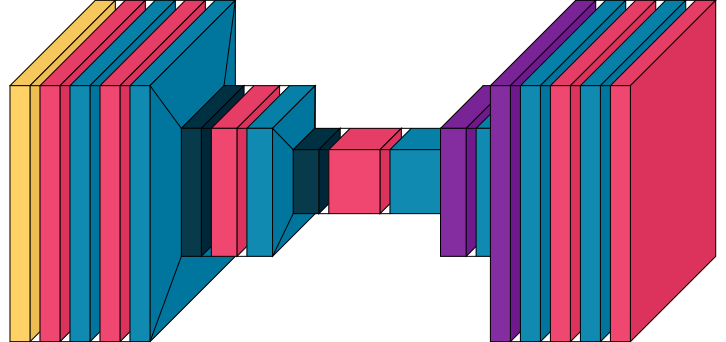

In [4]:
# the construction of autoencoder
visualkeras.layered_view(Building_autoencoder())

In [5]:
# fit training autoencoder

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
autoencoder = Building_autoencoder()
history = autoencoder.fit(X, X, epochs=7, batch_size=32, validation_split=0.25,callbacks= early_stop)

Epoch 1/7
141/141 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - loss: 0.0706 - val_loss: 0.7385
Epoch 2/7
141/141 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - loss: 0.0075 - val_loss: 0.9594
Epoch 3/7
141/141 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - loss: 0.0087 - val_loss: 0.0046
Epoch 4/7
141/141 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - loss: 0.0051 - val_loss: 0.0023
Epoch 5/7
141/141 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - loss: 0.0028 - val_loss: 0.0012
Epoch 6/7
141/141 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - loss: 0.0032 - val_loss: 0.0013
Epoch 7/7
141/141 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - loss: 0.0017 - val_loss: 6.3213e-04


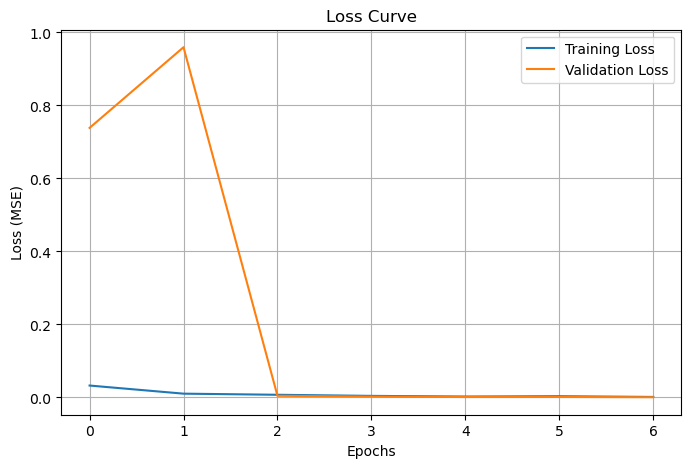

In [11]:

def plot_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    
    plt.title("Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history)

In [13]:
# calcualte the threshold level at the error bit rate

errors = []

for i in range(len(X)):
    x = np.expand_dims(X[i], axis=0)
    reconstructed = autoencoder.predict(x, verbose = 2)[0]
    err = mean_squared_error(X[i].flatten(), reconstructed.flatten())
    errors.append(err)


1/1 - 0s - 228ms/step
1/1 - 0s - 38ms/step
1/1 - 0s - 32ms/step
1/1 - 0s - 49ms/step
1/1 - 0s - 47ms/step
1/1 - 0s - 31ms/step
1/1 - 0s - 38ms/step
1/1 - 0s - 38ms/step
1/1 - 0s - 46ms/step
1/1 - 0s - 28ms/step
1/1 - 0s - 35ms/step
1/1 - 0s - 31ms/step
1/1 - 0s - 45ms/step
1/1 - 0s - 32ms/step
1/1 - 0s - 31ms/step
1/1 - 0s - 44ms/step
1/1 - 0s - 46ms/step
1/1 - 0s - 32ms/step
1/1 - 0s - 45ms/step
1/1 - 0s - 47ms/step
1/1 - 0s - 31ms/step
1/1 - 0s - 32ms/step
1/1 - 0s - 46ms/step
1/1 - 0s - 31ms/step
1/1 - 0s - 31ms/step
1/1 - 0s - 27ms/step
1/1 - 0s - 53ms/step
1/1 - 0s - 32ms/step
1/1 - 0s - 35ms/step
1/1 - 0s - 37ms/step
1/1 - 0s - 31ms/step
1/1 - 0s - 49ms/step
1/1 - 0s - 46ms/step
1/1 - 0s - 25ms/step
1/1 - 0s - 27ms/step
1/1 - 0s - 51ms/step
1/1 - 0s - 29ms/step
1/1 - 0s - 31ms/step
1/1 - 0s - 47ms/step
1/1 - 0s - 31ms/step
1/1 - 0s - 33ms/step
1/1 - 0s - 41ms/step
1/1 - 0s - 32ms/step
1/1 - 0s - 31ms/step
1/1 - 0s - 31ms/step
1/1 - 0s - 43ms/step
1/1 - 0s - 46ms/step
1/1 - 0s - 2

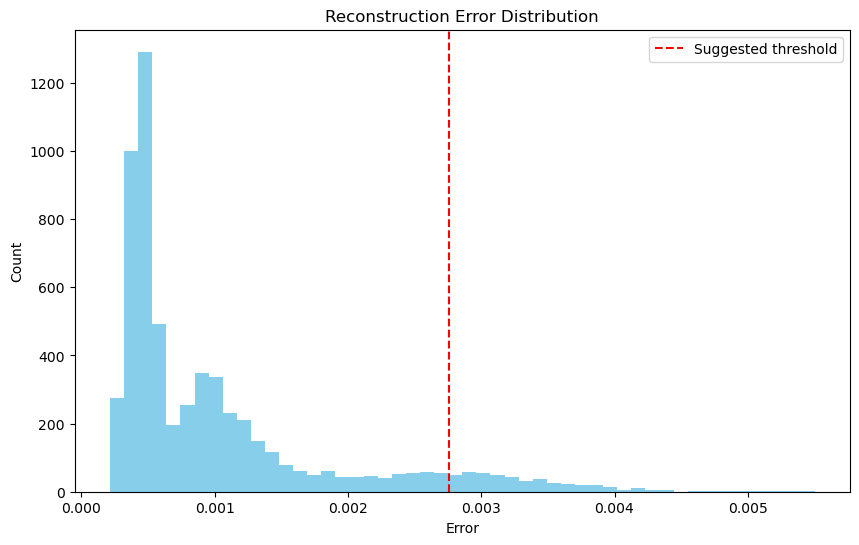

Suggested threshold: 0.00276


In [15]:

plt.figure(figsize=(10,6)) #change your figure size as per your desire here
plt.hist(errors, bins=50, color='skyblue')
plt.axvline(np.mean(errors) + 2*np.std(errors), color='red', linestyle='--', label='Suggested threshold')
plt.title("Reconstruction Error Distribution")
plt.xlabel("Error")
plt.ylabel("Count")
plt.legend()
plt.show()

print(f"Suggested threshold: {np.mean(errors) + 2*np.std(errors):.5f}")

In [17]:
# # appending the threshold value to python file
with open(r'd:\AI Projects\Signals detecting and classification system\config.py', "a") as f:
    f.write(f"\nThreshold = {np.mean(errors) + 2*np.std(errors):.5f}\n")

In [19]:
# saving autoencoders
autoencoder.save(r'd:\AI Projects\Signals detecting and classification system\models\autoencoder_model.keras')